# Plotting all

[      0     100     200 ... 2999700 2999800 2999900]
[2000.  2001.  2000.5 ... 2034.5 2033.  2033.5]


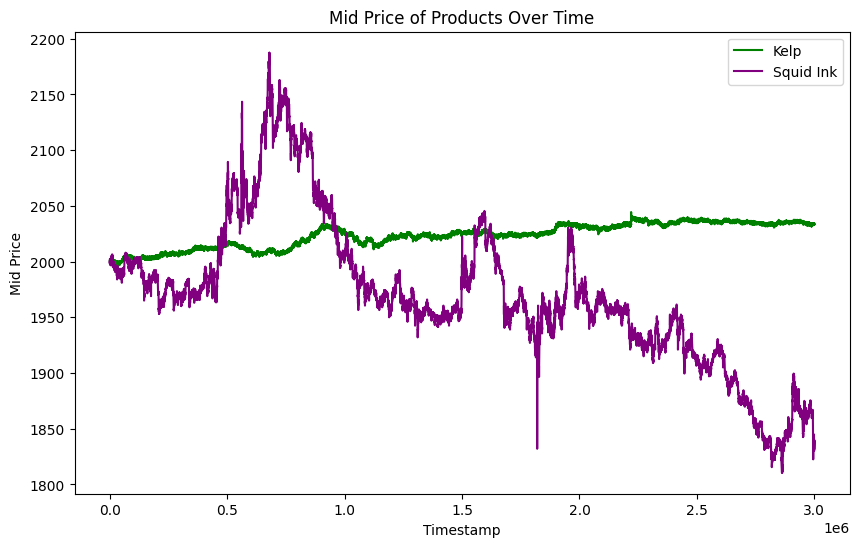

In [10]:
import pandas as pd
import numpy as np

prices1 = pd.read_csv(r'./round-1-island-data-bottle/round-1-island-data-bottle/prices_round_1_day_-2.csv',sep=';')
prices2 = pd.read_csv(r'./round-1-island-data-bottle/round-1-island-data-bottle/prices_round_1_day_-1.csv',sep=';')
prices3 = pd.read_csv(r'./round-1-island-data-bottle/round-1-island-data-bottle/prices_round_1_day_0.csv',sep=';')

import matplotlib.pyplot as plt
# Concatenate all dataframes
all_prices = pd.concat([prices1, prices2, prices3])
all_prices['timestamp'] = all_prices['timestamp']+(1000000*(all_prices['day']+2))

kelp_data = all_prices[all_prices['product'] == 'KELP']
kelp_x = kelp_data['timestamp'].to_numpy()
kelp_y = kelp_data['mid_price'].to_numpy()
kelp_z1 = kelp_data['bid_price_1'].to_numpy()
kelp_z2 = kelp_data['bid_price_2'].to_numpy()
kelp_z3 = kelp_data['bid_price_3'].to_numpy()
kelp_w1 = kelp_data['ask_price_1'].to_numpy()
kelp_w2 = kelp_data['ask_price_2'].to_numpy()
kelp_w3 = kelp_data['ask_price_3'].to_numpy()
print(kelp_x)
print(kelp_y)

resin_data = all_prices[all_prices['product'] == 'RAINFOREST_RESIN']
resin_x = resin_data['timestamp'].to_numpy()
resin_y = resin_data['mid_price'].to_numpy()
resin_z1 = resin_data['bid_price_1'].to_numpy()
resin_z2 = resin_data['bid_price_2'].to_numpy()
resin_z3 = resin_data['bid_price_3'].to_numpy()
resin_w1 = resin_data['ask_price_1'].to_numpy()
resin_w2 = resin_data['ask_price_2'].to_numpy()
resin_w3 = resin_data['ask_price_3'].to_numpy()

squid_ink_data = all_prices[all_prices['product'] == 'SQUID_INK']
squid_ink_x = squid_ink_data['timestamp'].to_numpy()
squid_ink_y = squid_ink_data['mid_price'].to_numpy()
squid_ink_z1 = squid_ink_data['bid_price_1'].to_numpy()
squid_ink_z2 = squid_ink_data['bid_price_2'].to_numpy()
squid_ink_z3 = squid_ink_data['bid_price_3'].to_numpy()
squid_ink_w1 = squid_ink_data['ask_price_1'].to_numpy()
squid_ink_w2 = squid_ink_data['ask_price_2'].to_numpy()
squid_ink_w3 = squid_ink_data['ask_price_3'].to_numpy()



plt.figure(figsize=(10, 6))
plt.plot(kelp_x, kelp_y, label='Kelp', color='green')
# plt.plot(resin_x, resin_y, label='Rainforest Resin', color='blue')
plt.plot(squid_ink_x, squid_ink_y, label='Squid Ink', color='purple')
plt.xlabel('Timestamp')
plt.ylabel('Mid Price')
plt.title('Mid Price of Products Over Time')
plt.legend()
plt.show()

# print(all_prices.head(6))


# Fourier transform

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# from scipy.signal import diric  # just an example signal (optional)

def dtft(x, n, w):
    """
    Compute the DTFT of a signal x[n] over frequencies w.

    Parameters:
        x : ndarray
            Signal values.
        n : ndarray
            Time indices corresponding to x.
        w : ndarray
            Frequencies (in radians) where DTFT is evaluated.

    Returns:
        X : ndarray
            DTFT evaluated at frequencies in w.
    """
    x = squid_ink_y
    n = np.asarray(n)
    w = np.asarray(w)

    # Compute DTFT using matrix multiplication
    exponent = np.outer(n, w)  # shape (len(n), len(w))
    X = np.dot(x, np.exp(-1j * exponent))  # shape (len(w),)

    return X

# Example usage
N = 21
n = squid_ink_data['timestamp'].to_numpy()
x = squid_ink_y  # just a sample signal (Dirichlet function)
w = np.linspace(-np.pi, np.pi, 1024)

X = dtft(x, n, w)

# Plot magnitude and phase
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(w, np.abs(X))
plt.title('Magnitude Spectrum')
plt.xlabel('Frequency (rad/sample)')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(w, np.angle(X))
plt.title('Phase Spectrum')
plt.xlabel('Frequency (rad/sample)')
plt.grid()
plt.tight_layout()
plt.show()


ImportError: cannot import name 'diric' from 'scipy.signal' (c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\signal\__init__.py)

# For FFT:
## Just verifying frequency of each timestamp

In [11]:
dictt = {}
lisst = kelp_data['timestamp'].tolist()
for i in lisst:
    dictt[i] = dictt.get(i, 0) + 1
for (i,j) in dictt.items():
    if j != 1:
        print(i,j)
    

